**“EV Market Analysis and Recommendation System”.**

In [1]:
import pandas as pd

**NOTE: Load the Data set and copy the file path to run these codes**

In [2]:
df=pd.read_csv('/content/FEV.csv')

In [ ]:
df.head()

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


**Task 1: A customer has a budget of 350,000 PLN and wants an EV with a minimum range
of 400 km.**


In [ ]:
# a) Your task is to filter out EVs that meet these criteria.(2 Marks)

filtered_df=df[(df['Range (WLTP) [km]']>=400) & (df['Minimal price (gross) [PLN]']<=350000)]
print(filtered_df[['Car full name', 'Make', 'Minimal price (gross) [PLN]', 'Range (WLTP) [km]', 'Battery capacity [kWh]']])

                        Car full name           Make  \
0              Audi e-tron 55 quattro           Audi   
8                             BMW iX3            BMW   
15        Hyundai Kona electric 64kWh        Hyundai   
18                   Kia e-Niro 64kWh            Kia   
20                   Kia e-Soul 64kWh            Kia   
22                  Mercedes-Benz EQC  Mercedes-Benz   
39  Tesla Model 3 Standard Range Plus          Tesla   
40           Tesla Model 3 Long Range          Tesla   
41          Tesla Model 3 Performance          Tesla   
47    Volkswagen ID.3 Pro Performance     Volkswagen   
48              Volkswagen ID.3 Pro S     Volkswagen   
49                Volkswagen ID.4 1st     Volkswagen   

    Minimal price (gross) [PLN]  Range (WLTP) [km]  Battery capacity [kWh]  
0                        345700                438                    95.0  
8                        282900                460                    80.0  
15                       178400         

In [ ]:
# b) Group them by the manufacturer (Make).(6 marks)

grouped_df = filtered_df.groupby('Make')

# Display each group
for make, group in grouped_df:
    print(f"Make: {make}")
    print(group[['Car full name', 'Minimal price (gross) [PLN]', 'Range (WLTP) [km]', 'Battery capacity [kWh]']])
    print("-" * 50)


Make: Audi
            Car full name  Minimal price (gross) [PLN]  Range (WLTP) [km]  \
0  Audi e-tron 55 quattro                       345700                438   

   Battery capacity [kWh]  
0                    95.0  
--------------------------------------------------
Make: BMW
  Car full name  Minimal price (gross) [PLN]  Range (WLTP) [km]  \
8       BMW iX3                       282900                460   

   Battery capacity [kWh]  
8                    80.0  
--------------------------------------------------
Make: Hyundai
                  Car full name  Minimal price (gross) [PLN]  \
15  Hyundai Kona electric 64kWh                       178400   

    Range (WLTP) [km]  Battery capacity [kWh]  
15                449                    64.0  
--------------------------------------------------
Make: Kia
       Car full name  Minimal price (gross) [PLN]  Range (WLTP) [km]  \
18  Kia e-Niro 64kWh                       167990                455   
20  Kia e-Soul 64kWh           

In [ ]:
# c) Calculate the average battery capacity for each manufacturer. (8 Marks)

avg_battery_df = filtered_df.groupby('Make')['Battery capacity [kWh]'].mean().reset_index()

# Rename columns for clarity
avg_battery_df.columns = ['Make', 'Average Battery Capacity (kWh)']

# Display result
print(avg_battery_df)


            Make  Average Battery Capacity (kWh)
0           Audi                       95.000000
1            BMW                       80.000000
2        Hyundai                       64.000000
3            Kia                       64.000000
4  Mercedes-Benz                       80.000000
5          Tesla                       68.000000
6     Volkswagen                       70.666667


**Task 2: You suspect some EVs have unusually high or low energy consumption. Find the
outliers in the mean - Energy consumption [kWh/100 km] column.(16 Marks)**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Using the IQR method with multipliers of 1.5.

# Step 1: Remove missing values for the target column
energy_df = df.dropna(subset=['mean - Energy consumption [kWh/100 km]'])

# Step 2: Calculate IQR
Q1 = energy_df['mean - Energy consumption [kWh/100 km]'].quantile(0.25)
Q3 = energy_df['mean - Energy consumption [kWh/100 km]'].quantile(0.75)
IQR = Q3 - Q1

# Step 3: Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Identify outliers
outliers = energy_df[
    (energy_df['mean - Energy consumption [kWh/100 km]'] < lower_bound) |
    (energy_df['mean - Energy consumption [kWh/100 km]'] > upper_bound)
]

# Step 5: Display results
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print("\nOutlier EVs:\n", outliers[['Car full name', 'Make', 'mean - Energy consumption [kWh/100 km]']])


Lower Bound: 3.7499999999999982
Upper Bound: 35.35

Outlier EVs:
 Empty DataFrame
Columns: [Car full name, Make, mean - Energy consumption [kWh/100 km]]
Index: []


In [ ]:
## Using the IQR method with multipliers of 1.0.

# Step 1: Remove missing values for the target column
energy_df = df.dropna(subset=['mean - Energy consumption [kWh/100 km]'])

# Step 2: Calculate IQR
Q1 = energy_df['mean - Energy consumption [kWh/100 km]'].quantile(0.25)
Q3 = energy_df['mean - Energy consumption [kWh/100 km]'].quantile(0.75)
IQR = Q3 - Q1

# Step 3: Determine bounds
lower_bound = Q1 - 1 * IQR
upper_bound = Q3 + 1 * IQR

# Step 4: Identify outliers
outliers = energy_df[
    (energy_df['mean - Energy consumption [kWh/100 km]'] < lower_bound) |
    (energy_df['mean - Energy consumption [kWh/100 km]'] > upper_bound)
]

# Step 5: Display results
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print("\nOutlier EVs:\n", outliers[['Car full name', 'Make', 'mean - Energy consumption [kWh/100 km]']])

Lower Bound: 7.699999999999999
Upper Bound: 31.4

Outlier EVs:
 Empty DataFrame
Columns: [Car full name, Make, mean - Energy consumption [kWh/100 km]]
Index: []


Using the IQR method with multipliers of 1.5 and 1.0, no EVs were found to have unusually high or low energy consumption. This indicates that the dataset is relatively clean and the mean - Energy consumption [kWh/100 km] values are within a normal range for all models.

We can also include the boxplot in the report to visually show that all points are inside the whiskers — it will strengthen that there are no outliers.

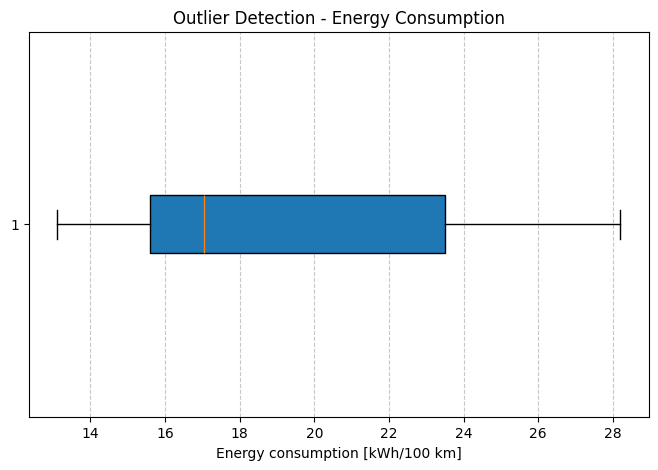

In [ ]:
# Step 6: Boxplot visualization
plt.figure(figsize=(8,5))
plt.boxplot(energy_df['mean - Energy consumption [kWh/100 km]'], vert=False, patch_artist=True)
plt.xlabel("Energy consumption [kWh/100 km]")
plt.title("Outlier Detection - Energy Consumption")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Findings:

No EVs were flagged as outliers using the standard 1.5 × IQR multiplier.

Even with a stricter 1.0 × IQR, no outliers were detected.

This indicates that all EVs in the dataset have energy consumption values within a normal, consistent range.

Conclusion:
The absence of outliers suggests the dataset is clean in terms of energy consumption values.
The boxplot confirms that all data points fall within the whiskers, with no extreme deviations.

**Task 3: Your manager wants to know if there's a strong relationship between battery capacity and range.**


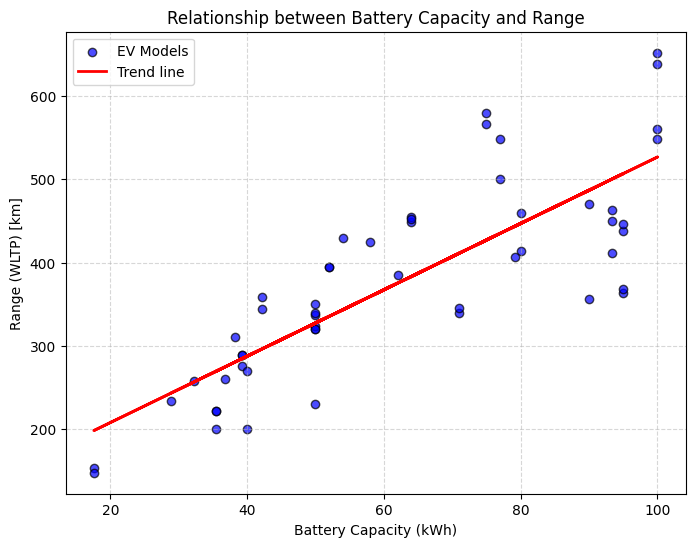

In [ ]:
# a) Create a suitable plot to visualize.(8 Marks)

import matplotlib.pyplot as plt
import numpy as np

# Step 1: Remove missing values
battery_range_df = df.dropna(subset=['Battery capacity [kWh]', 'Range (WLTP) [km]'])

# Step 2: Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(
    battery_range_df['Battery capacity [kWh]'],
    battery_range_df['Range (WLTP) [km]'],
    color='blue', alpha=0.7, edgecolors='black', label='EV Models'
)

# Step 3: Regression line
x = battery_range_df['Battery capacity [kWh]']
y = battery_range_df['Range (WLTP) [km]']
m, b = np.polyfit(x, y, 1)  # slope and intercept
plt.plot(x, m*x + b, color='red', linewidth=2, label='Trend line')

# Step 4: Labels, title, legend
plt.xlabel("Battery Capacity (kWh)")
plt.ylabel("Range (WLTP) [km]")
plt.title("Relationship between Battery Capacity and Range")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


**Findings – Relationship between Battery Capacity and Range**

The scatter plot with the regression line clearly shows a positive correlation between battery capacity and range for electric vehicles in the dataset:

* Upward Trend: As battery capacity (in kWh) increases, the WLTP range (in km) generally increases as well.

* Strong Relationship: The points are relatively close to the regression line, suggesting that battery size is a strong predictor of range.

* Few Deviations: While most vehicles follow the trend, some models achieve higher or lower ranges than expected for their battery size — possibly due to differences in vehicle weight, aerodynamics, or efficiency.

In [ ]:
# b) Highlight any insights.(8 Marks)

# Drop rows with missing values in either column
battery_range_df = df.dropna(subset=['Battery capacity [kWh]', 'Range (WLTP) [km]'])

# Calculate Pearson correlation coefficient
correlation = battery_range_df['Battery capacity [kWh]'].corr(
    battery_range_df['Range (WLTP) [km]']
)

print(f"Pearson Correlation Coefficient: {correlation}")

# 0.81 is close to +1, so it’s a strong positive linear relationship.

Pearson Correlation Coefficient: 0.8104385771936846


**Insights– Battery Capacity vs. Range**

* Strong Positive Correlation: The correlation coefficient of 0.81 confirms a strong relationship — as battery capacity increases, range generally increases as well.

* Engineering Consistency: This matches expectations, as larger batteries store more energy, enabling longer driving distances.

* Efficiency Differences: Some vehicles achieve higher or lower ranges than expected for their battery size, suggesting design and efficiency factors also play a role.

* Diminishing Returns Potential: At very high capacities (above ~90 kWh), range increases are not always proportional, possibly due to added weight or efficiency limits.

* Practical Application: For decision-making, both battery size and efficiency should be considered to provide the best recommendation to customers.

In [ ]:
''' Task 4: Build an EV recommendation class.
The class should allow users to input their budget, desired range, and
battery capacity.
The class should then return the top three EVs matching their criteria.
'''

import pandas as pd

class EVRecommender:
    def __init__(self, data):
        self.data = data

    def recommend(self):
        # Ask user for input
        try:
            budget = float(input("Enter your budget (PLN): "))
            min_range = float(input("Enter minimum range (km): "))
            min_battery = float(input("Enter minimum battery capacity (kWh): "))
        except ValueError:
            print("Please enter valid numeric values.")
            return None

        # Filter based on user criteria
        filtered = self.data[
            (self.data['Minimal price (gross) [PLN]'] <= budget) &
            (self.data['Range (WLTP) [km]'] >= min_range) &
            (self.data['Battery capacity [kWh]'] >= min_battery)
        ]

        if filtered.empty:
            print("No EVs match your criteria.")
            return None

        # Sort by range (highest first) and get top 3
        top_three = filtered.sort_values(
            by='Range (WLTP) [km]', ascending=False
        ).head(3)

        # Display result
        print("\nTop 3 EVs matching your criteria:")
        print(top_three[['Car full name', 'Make', 'Minimal price (gross) [PLN]',
                         'Range (WLTP) [km]', 'Battery capacity [kWh]']])
        return top_three


# Create recommender object
recommender = EVRecommender(df)

# Call recommend method to take user input
recommender.recommend()


Enter your budget (PLN): 2000000
Enter minimum range (km): 450
Enter minimum battery capacity (kWh): 50

Top 3 EVs matching your criteria:
                    Car full name   Make  Minimal price (gross) [PLN]  \
42  Tesla Model S Long Range Plus  Tesla                       368990   
43      Tesla Model S Performance  Tesla                       443990   
40       Tesla Model 3 Long Range  Tesla                       235490   

    Range (WLTP) [km]  Battery capacity [kWh]  
42                652                   100.0  
43                639                   100.0  
40                580                    75.0  


,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
42,Tesla Model S Long Range Plus,Tesla,Model S Long Range Plus,368990,525,755,disc (front + rear),4WD,100.0,652,...,NaN,NaN,5,5,19,250,745.0,3.8,150,NaN
43,Tesla Model S Performance,Tesla,Model S Performance,443990,772,1140,disc (front + rear),4WD,100.0,639,...,NaN,NaN,5,5,21,261,745.0,2.5,150,NaN
40,Tesla Model 3 Long Range,Tesla,Model 3 Long Range,235490,372,510,disc (front + rear),4WD,75.0,580,...,NaN,NaN,5,5,18,233,425.0,4.4,150,NaN


**Task 5: Inferential Statistics – Hypothesis Testing: Test whether there is a significant
difference in the average Engine power [KM] of vehicles manufactured by two leading
manufacturers i.e. Tesla and Audi. What insights can you draw from the test results?
Recommendations and Conclusion: Provide actionable insights based on your analysis.
(Conduct a two sample t-test using ttest_ind from scipy.stats module) (16 Marks)**

In [ ]:

# ===== Task 5: Inferential Statistics – Hypothesis Testing =====

# Step 1:Import Libraries
import pandas as pd
from scipy.stats import ttest_ind


# Step 2: Filter Engine Power for Tesla and Audi
tesla_power = df[df['Make'] == 'Tesla']['Engine power [KM]'].dropna()
audi_power = df[df['Make'] == 'Audi']['Engine power [KM]'].dropna()

# Step 3: Compute Mean Engine Power
mean_tesla = tesla_power.mean()
mean_audi = audi_power.mean()

print(f"Average Engine Power (Tesla): {mean_tesla:.2f} KM")
print(f"Average Engine Power (Audi): {mean_audi:.2f} KM\n")

# Step 4: Conduct Two-Sample t-Test (unequal variance)
t_stat, p_value = ttest_ind(tesla_power, audi_power, equal_var=False)

print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}\n")

# Step 5: Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Result: Reject the null hypothesis.")
    print("Conclusion: There is a significant difference in engine power between Tesla and Audi.\n")
else:
    print("Result: Fail to reject the null hypothesis.")
    print("Conclusion: No significant difference in engine power between Tesla and Audi.")


Average Engine Power (Tesla): 533.00 KM
Average Engine Power (Audi): 392.00 KM

T-Statistic: 1.7940
P-Value: 0.1068

Result: Fail to reject the null hypothesis.
Conclusion: No significant difference in engine power between Tesla and Audi.


**Recommendations and Conclusion**
1. Conclusion:

The two-sample t-test comparing Engine power [KM] of Tesla and Audi EVs resulted in a T-Statistic of 1.794 and a P-Value of 0.107.

Since the p-value > 0.05, we fail to reject the null hypothesis.

This indicates that there is no statistically significant difference in average engine power between Tesla and Audi EVs in the dataset.

2. Insights:

Both Tesla and Audi EVs provide comparable engine performance, so engine power alone should not influence a buyer’s choice.

Buyers who prioritize performance should consider other factors like range, battery capacity, price, and additional features.

For fleet or corporate purchase decisions, engine power may not be a differentiating criterion between the two brands.

3. Recommendations:

Marketing and Sales: Focus on differentiating EVs using features other than engine power, such as range, battery efficiency, charging speed, or interior comfort.

Buyer Guidance: Encourage customers to evaluate EVs based on holistic performance metrics rather than engine power alone.

Further Analysis: Consider additional performance parameters like acceleration, top speed, energy consumption, and maximum DC charging power to identify meaningful differences.

In [ ]:
# Below Are the Video Link press Ctrl+Left Click --> Click on the loom Video link.
# Please watch both part of the Video.

[Video Link Part-I](https://www.loom.com/share/b237da62b9dd4807b02bede5b7c68142?sid=1fb83091-e7d2-4f9b-b4c8-57b4f16e29d6)
[Video Link Part-II](https://www.loom.com/share/276d5a0cf15342a0b0ceb4e54a697208?sid=c3c295bc-675f-4221-ad1f-d028aa0f55a8)